In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
tf.executing_eagerly()
tf.test.is_gpu_available()

True

In [3]:
train_path = os.path.join(os.getcwd(), 'real_face_data\\train')
val_path = os.path.join(os.getcwd(), 'real_face_data\\validation')

print(os.path.exists(train_path))
print(os.path.exists(val_path))

normal_train_path = os.path.join(os.getcwd(), 'real_face_data\\train\\normal')
normal_val_path = os.path.join(os.getcwd(), 'real_face_data\\validation\\normal')
blurred_train_path = os.path.join(os.getcwd(), 'real_face_data\\train\\shaky')
blurred_val_path = os.path.join(os.getcwd(), 'real_face_data\\validation\\shaky')

num_normal_tr = len(os.listdir(normal_train_path))
num_blurred_tr = len(os.listdir(blurred_train_path))

num_normal_val = len(os.listdir(normal_val_path))
num_blurred_val = len(os.listdir(blurred_val_path))

print(num_normal_tr)
print(num_blurred_tr)
print(num_normal_val)
print(num_blurred_val)

total_train = num_normal_tr+num_blurred_tr
total_val = num_normal_val+num_blurred_val

print(total_train)
print(total_val)


True
True
1053
1086
489
484
2139
973


In [4]:
batch_size = 64
epochs = 10
IMG_HEIGHT = 64
IMG_WIDTH = 64

In [5]:
def rgbToGray(image):
    #print(tf.image.rgb_to_grayscale(image).shape)
    return tf.image.rgb_to_grayscale(image)

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=45,
                                          width_shift_range=.15,
                                          height_shift_range=.15,
                                          horizontal_flip=True,
                                          zoom_range=0.5) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,
                                               rotation_range=45,
                                              width_shift_range=.15,
                                              height_shift_range=.15,
                                              horizontal_flip=True,
                                              zoom_range=0.5) # Generator for our validation data

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           color_mode='grayscale',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2139 images belonging to 2 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_path,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              color_mode='grayscale',
                                                              class_mode='binary')

Found 973 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

In [10]:
'''
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')
])
'''

"\nmodel = Sequential([\n    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),\n    BatchNormalization(),\n    MaxPooling2D(),\n    Conv2D(32, 3, padding='same', activation='relu'),\n    BatchNormalization(),\n    MaxPooling2D(),\n    Conv2D(64, 3, padding='same', activation='relu'),\n    BatchNormalization(),\n    MaxPooling2D(),\n    Conv2D(128, 3, padding='same', activation='relu'),\n    BatchNormalization(),\n    GlobalAveragePooling2D(),\n    Dense(128, activation='relu'),\n    BatchNormalization(),\n    Dense(2, activation='softmax')\n])\n"

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [12]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
33/33 [==============================] - 11s 347ms/step - loss: 0.6893 - accuracy: 0.5137 - val_loss: 0.6359 - val_accuracy: 0.5531
Epoch 2/10
33/33 [==============================] - 12s 362ms/step - loss: 0.6451 - accuracy: 0.6671 - val_loss: 0.5823 - val_accuracy: 0.7146
Epoch 3/10
33/33 [==============================] - 11s 339ms/step - loss: 0.5721 - accuracy: 0.7267 - val_loss: 0.6891 - val_accuracy: 0.6156
Epoch 4/10
33/33 [==============================] - 11s 332ms/step - loss: 0.5459 - accuracy: 0.7263 - val_loss: 0.5781 - val_accuracy: 0.7063
Epoch 5/10
33/33 [==============================] - 11s 329ms/step - loss: 0.5060 - accuracy: 0.7614 - val_loss: 0.4881 - val_accuracy: 0.7625
Epoch 6/10
33/33 [==============================] - 11s 319ms/step - loss: 0.4665 - accuracy: 0.7817 - val_loss: 0.5221 - val_accuracy: 0.7708
Epoch 7/10
33/33 [==============================] - 10s 315ms/step - loss: 0.5008 - accuracy: 0.7663 - val_loss: 0.4148 - val_accuracy: 0.8135

In [13]:
tf.saved_model.save(model, "./model/1/")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model/1/assets


Using TensorFlow backend.
C:\Users\beplu\Anaconda3\envs\virtualenv\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\beplu\Anaconda3\envs\virtualenv\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


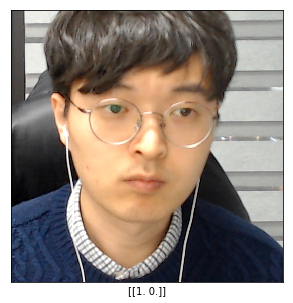

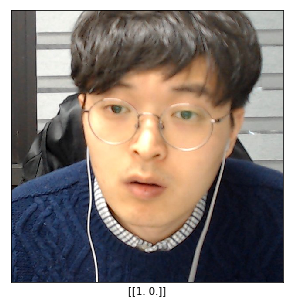

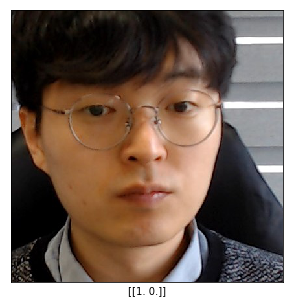

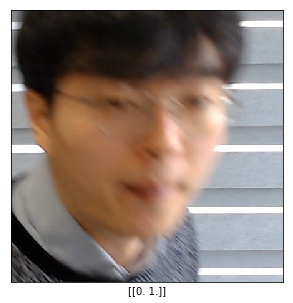

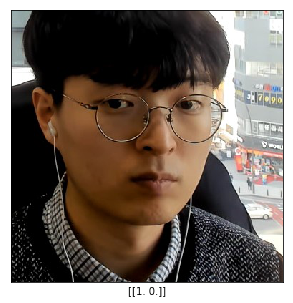

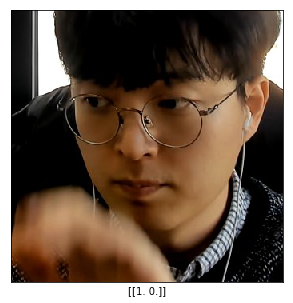

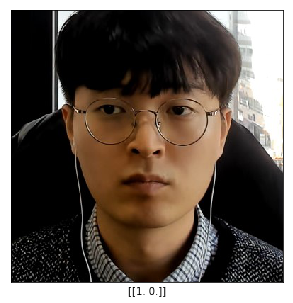

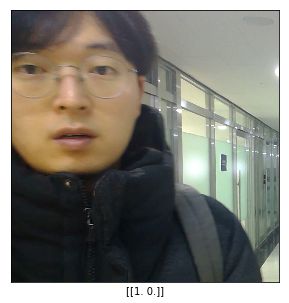

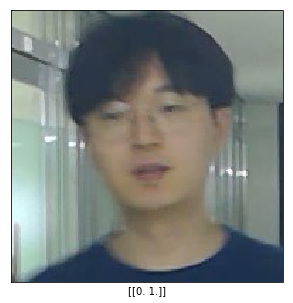

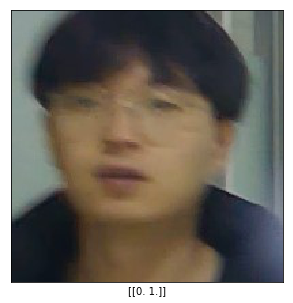

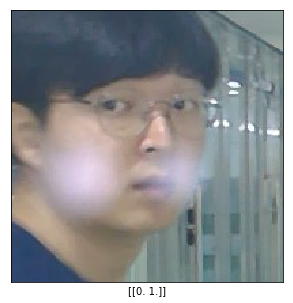

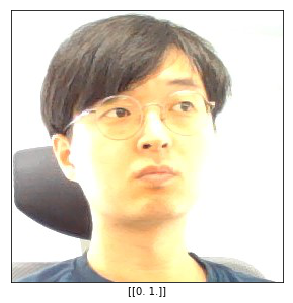

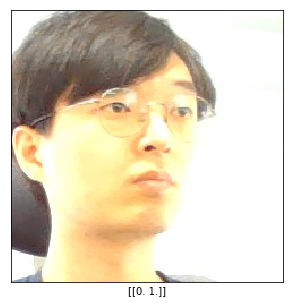

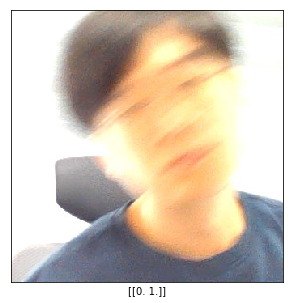

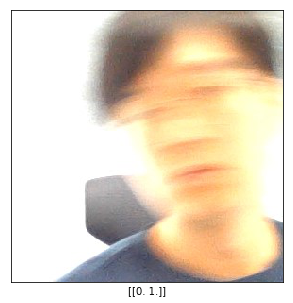

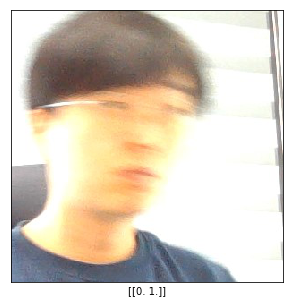

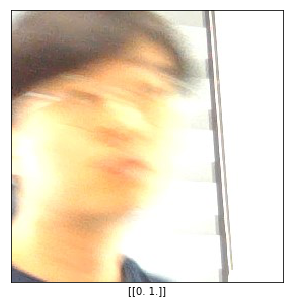

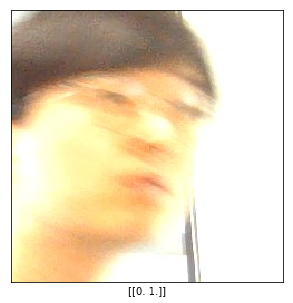

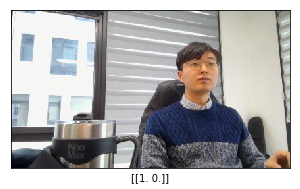

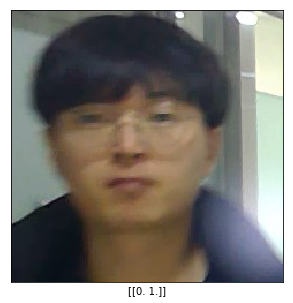

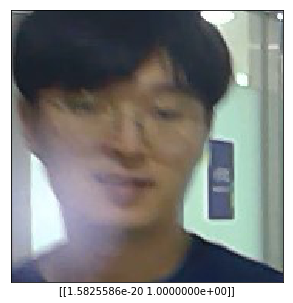

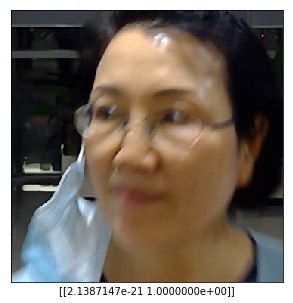

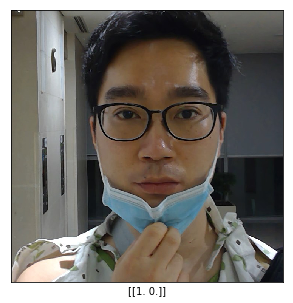

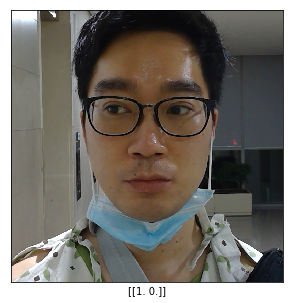

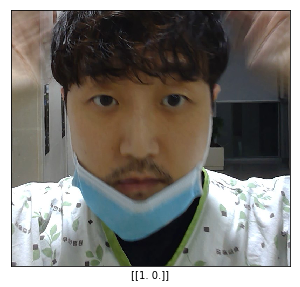

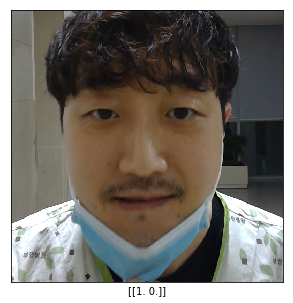

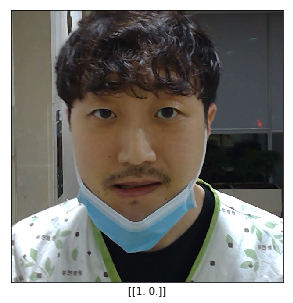

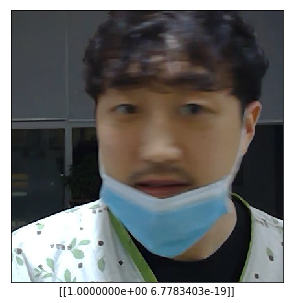

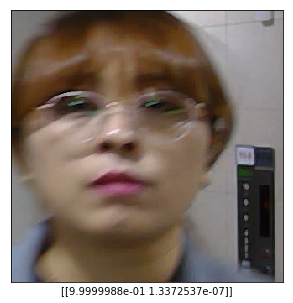

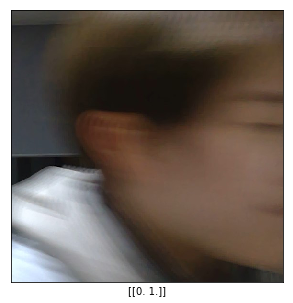

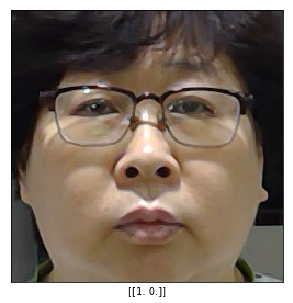

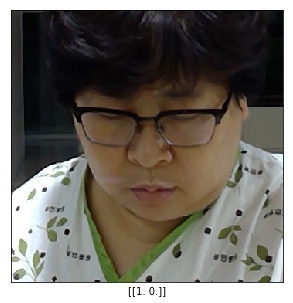

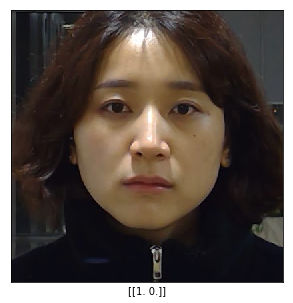

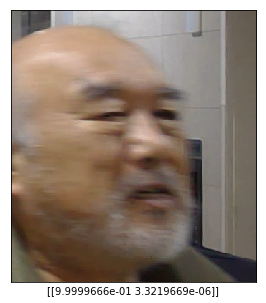

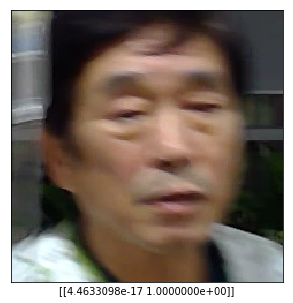

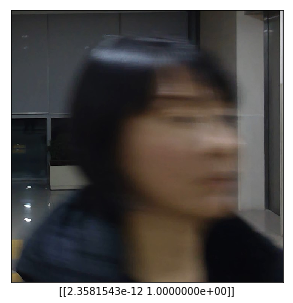

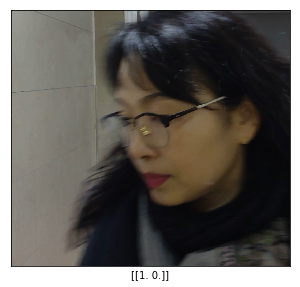

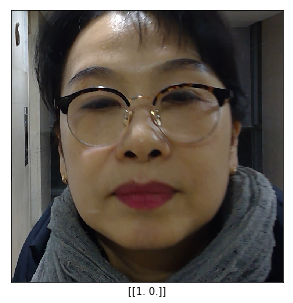

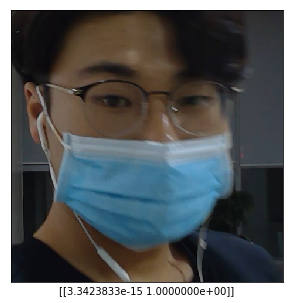

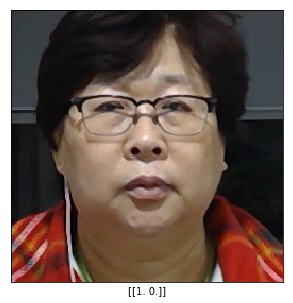

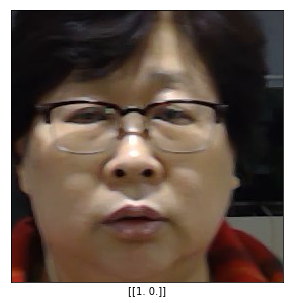

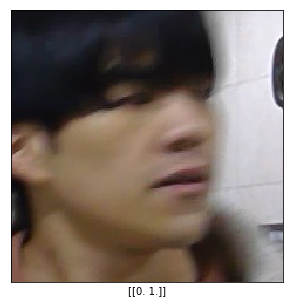

In [14]:
from keras.preprocessing import image

picture_path = 'C:\\Users\\beplu\\Pictures\\blur'

for pic in os.listdir(picture_path):
    x_test = image.load_img(os.path.join(picture_path, pic))    
    x_test = image.img_to_array(x_test)
    x_test = tf.image.resize(x_test,(64,64))
    x_test = tf.image.rgb_to_grayscale(x_test)
    x_test = tf.expand_dims(x_test,0)
    result = model.predict(x_test)
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    img = mpimg.imread(os.path.join(picture_path, pic))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(result)
    #print(pic, ' = ', 티뮤디(result)#print(pic, ' = ', result[0])